In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import *
from keras.layers import *
from keras.metrics import Recall
from PIL import Image
from numpy import asarray
import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [27]:
! chmod 600 /root/.kaggle/kaggle.json

In [28]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip 'covid19-radiography-database.zip'

In [2]:
import glob

covid = 0
normal = 0

images = []

for filename in glob.iglob('/content/COVID-19_Radiography_Dataset/COVID/images' + '**/*'):
  if covid < 2000:
    im = Image.open(filename)
    images.append((np.asarray(im.convert("L").resize((250,250)))/255))
    covid +=1
  else:
    break;

for filename in glob.iglob('/content/COVID-19_Radiography_Dataset/Normal/images' + '**/*'):
  if normal < 4000:
    im = Image.open(filename)
    images.append((np.asarray(im.convert("L").resize((250,250)))/255))
    normal +=1
  else:
    break;


In [3]:
images = np.array(images).astype(np.float32)

In [4]:
labels = np.ones(covid)

labels = np.append(labels, np.zeros(normal)).astype(int)

labels.shape

(6000,)

In [ ]:
# df = pd.DataFrame(labels, columns=['status'] )

# df['images'] = images


# df

In [ ]:
# # Shuffling rows 
# df = df.sample(frac=1, axis=0).sample(frac=1).reset_index(drop=True)
# df

In [ ]:
# for x in range(df.images.shape[0]):
#   df['images'][x] = np.array(df['images'][x].resize((250,250))).astype(np.float32)

In [5]:
x_train, x_test, y_train, y_test, = train_test_split(images,
                                                     labels, 
                                                     test_size=0.2, 
                                                     random_state = 42, 
                                                     shuffle=True)

x_train = np.array(x_train).astype('float32').reshape((4800,250,250))
x_test = np.array(x_test).astype('float32').reshape((1200,250,250))



In [6]:
y_test.shape, y_train.shape

((1200,), (4800,))

In [15]:
x_train.shape

(4800, 250, 250)

In [8]:
# from keras.layers import Dense, Input, Dropout,Conv2D,AvgPool2D,Flatten

# # model.add(Conv2D(filters=6,kernel_size=5,strides=(1,1),padding='same',activation='relu'))

# model=keras.Sequential()
# model.add(Conv2D(input_shape=(299,299,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
# model.add(Flatten(name='flatten'))
# model.add(Dense(4096, activation='relu', name='fc1'))
# model.add(Dense(4096, activation='relu', name='fc2'))
# model.add(Dense(1, activation='softmax', name='output'))

# model.summary()


In [9]:
from keras.layers import Dense, Input, Dropout,Conv2D,AvgPool2D,Flatten

model = Sequential()
# model.add(Input(shape=(224, 224,1)))

#  model.add(Conv2D(filters=6,kernel_size=5,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=96,kernel_size=11,strides=(4,4),padding='same',input_shape=((250,250,1)), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=5,strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(filters=384,kernel_size=3,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=384,kernel_size=3,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=384,kernel_size=3,strides=(1,1),padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=3,strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))




model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 384)       1

In [10]:
model.compile(optimizer='sgd',loss= 'binary_crossentropy',metrics=['accuracy',Recall()])


In [11]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results = model.fit(
        x_train,
        y_train,
        epochs=30,
        validation_data=(x_test, y_test)
        )

Epoch 1/30
150/150 [==============================] - 21s 63ms/step - loss: 0.6378 - accuracy: 0.6698 - recall: 0.0032 - val_loss: 0.6617 - val_accuracy: 0.6358 - val_recall: 0.0000e+00
Epoch 2/30
150/150 [==============================] - 9s 57ms/step - loss: 0.6194 - accuracy: 0.6744 - recall: 0.0000e+00 - val_loss: 0.6347 - val_accuracy: 0.6358 - val_recall: 0.0000e+00
Epoch 3/30
150/150 [==============================] - 9s 57ms/step - loss: 0.5850 - accuracy: 0.6865 - recall: 0.1004 - val_loss: 0.5866 - val_accuracy: 0.6425 - val_recall: 0.0183
Epoch 4/30
150/150 [==============================] - 9s 58ms/step - loss: 0.5436 - accuracy: 0.7221 - recall: 0.3122 - val_loss: 0.5327 - val_accuracy: 0.7358 - val_recall: 0.6407
Epoch 5/30
150/150 [==============================] - 9s 59ms/step - loss: 0.5029 - accuracy: 0.7554 - recall: 0.4639 - val_loss: 0.4946 - val_accuracy: 0.7625 - val_recall: 0.4760
Epoch 6/30
150/150 [==============================] - 9s 59ms/step - loss: 0.4685 

In [12]:
score = model.evaluate(x_test, y_test)

38/38 [==============================] - 1s 22ms/step - loss: 0.2388 - accuracy: 0.8992 - recall: 0.8398


In [13]:
pred = model.predict(x_test)
pred = ((pred>=0.5).astype(int))
pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))
print(accuracy_score(pred, y_test))

[[712  70]
 [ 51 367]]
0.8991666666666667


In [16]:
from numpy import argmax
pred1 = argmax(pred,axis=1)

[0]
0


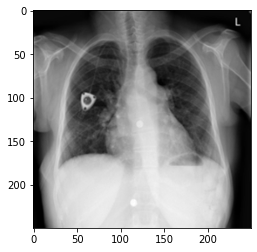

In [17]:
plt.imshow(x_test[23],cmap='gray')
print(pred[23])
print(pred1[23])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# from keras.models import save_model
# model.save('/content/drive/MyDrive/savedModels/covid-19.h5')